In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr
path="C:\\Users\\HARIKA\\Desktop\\DataScience_2019501065\\Intro_to_ML\\Code Camp1\\linear regression\\"
train = path + "train.csv"
test = path + "test.csv"

In [3]:
trainx_df = pd.read_csv(train, index_col = 'Id')
print(trainx_df.shape)

(1460, 80)


In [4]:
trainy_df = trainx_df['SalePrice']
print(trainy_df.shape)

(1460,)


In [5]:
trainx_df.drop('SalePrice', axis=1, inplace=True)
testx_df = pd.read_csv(test, index_col='Id')
print(trainx_df.isnull().sum())


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64


In [6]:
sample_size = len(trainx_df)
columns_with_null_values = []
columns_with_null_values = [[col, float(trainx_df[col].isnull().sum())/float(sample_size)] for col in trainx_df.columns if trainx_df[col].isnull().sum()]
print(columns_with_null_values)

[['LotFrontage', 0.1773972602739726], ['Alley', 0.9376712328767123], ['MasVnrType', 0.005479452054794521], ['MasVnrArea', 0.005479452054794521], ['BsmtQual', 0.025342465753424658], ['BsmtCond', 0.025342465753424658], ['BsmtExposure', 0.026027397260273973], ['BsmtFinType1', 0.025342465753424658], ['BsmtFinType2', 0.026027397260273973], ['Electrical', 0.0006849315068493151], ['FireplaceQu', 0.4726027397260274], ['GarageType', 0.05547945205479452], ['GarageYrBlt', 0.05547945205479452], ['GarageFinish', 0.05547945205479452], ['GarageQual', 0.05547945205479452], ['GarageCond', 0.05547945205479452], ['PoolQC', 0.9952054794520548], ['Fence', 0.8075342465753425], ['MiscFeature', 0.963013698630137]]


In [7]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y>.3]
print(columns_to_drop)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
trainx_df.drop(columns_to_drop, axis = 1, inplace=True)
testx_df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
categorical_columns = [col for col in trainx_df.columns if
                      trainx_df[col].dtype == object]
ordinal_columns = [col for col in trainx_df.columns if col not in categorical_columns]

In [10]:
#categorical_columns.append('MSSubClass')
print(categorical_columns)
dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
print(dummy_row)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['', 'dummy', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', '', 'dummy', '', 'dummy', '', 'dummy', '', 'dummy', '', '', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', 'dummy', 

In [11]:
new_row = pd.DataFrame([dummy_row], columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis = 0, ignore_index = True)
testx_df = pd.concat([testx_df], axis = 0, ignore_index = True)
# trainx_df.to_csv["dummy.csv"]
for col in categorical_columns:
    trainx_df[col].fillna(value = "dummy", inplace = True)
    testx_df[col].fillna(value = "dummy", inplace = True)

In [12]:
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(trainx_df[categorical_columns])
#print(enc.get_feature_names(categorical_columns))
trainx_enc=pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
testx_enc = pd.DataFrame(enc.transform(testx_df[categorical_columns]))
trainx_enc.columns=enc.get_feature_names(categorical_columns)
testx_enc.columns=enc.get_feature_names(categorical_columns)
trainx_df=pd.concat([trainx_df[ordinal_columns],trainx_enc],axis=1,ignore_index=
                    True)
testx_df=pd.concat([testx_df[ordinal_columns],testx_enc],axis=1,ignore_index=
                    True)
trainx_df.drop(trainx_df.tail(1).index,inplace=True)
imputer = KNNImputer(n_neighbors=2)
imputer.fit(trainx_df)
trainx_df_filled=imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled,columns=trainx_df.columns)
testx_df_filled=imputer.transform(testx_df)
testx_df_filled = pd.DataFrame(testx_df_filled,columns=testx_df.columns)
testx_df_filled.reset_index(drop=True,inplace=True)
print(trainx_df_filled.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    0
Length: 270, dtype: int64


In [13]:
scale = "Standard"
if scale == 'Standard':
    scaler = preprocessing.StandardScaler().fit(trainx_df)
    trainx_df=scaler.transform(trainx_df)
    testx_df=scaler.transform(testx_df)
elif scale == 'MinMax':
    scaler=preprocessing.MinMaxScaler().fit(trainx_df)
    trainx_df=scaler.transform(trainx_df)
    testx_df=scaler.transform(testx_df)
print(trainx_df,testx_df)

[[ 0.07337496 -0.20803433 -0.20714171 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.40989452 -0.09188637 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496 -0.08444856  0.07347998 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [ 0.30985939 -0.16683907 -0.14781027 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276 -0.08444856 -0.08016039 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.20391824 -0.05811155 ...  0.4676514  -0.30599503
   0.        ]] [[-0.87256276  0.40989452  0.11076257 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.45108977  0.37584985 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496  0.16272298  0.33205282 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [-0.87256276  3.70551504  0.95042275 ... -2.13834494 -0.30599503
   0.        ]
 [ 0.66458604 -0.3316201  -0.00759964 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496  0.16272298 -0.08918038 ...  0.4676514  -0.30599503
   0.        ]]


In [14]:
scaler = preprocessing.StandardScaler().fit(trainx_df_filled)
trainx_df_filled = scaler.transform(trainx_df_filled)
testx_df_filled = scaler.transform(testx_df_filled)
X_train, X_test, y_train, y_test = train_test_split(trainx_df_filled, trainy_df.values.ravel(), test_size = 0.3, random_state = 42)

0.9342381231479655
-1.1686015869593065e+19
[10.05, 16.82777777777778, 23.605555555555554, 30.383333333333333, 37.16111111111111, 43.93888888888888, 50.71666666666667, 57.49444444444444, 64.27222222222223, 71.05] 
 [0.926411099, 0.9224066679, 0.9194145436, 0.9170660379, 0.9151401553, 0.9135052527, 0.912079598, 0.9108100917, 0.9096607818, 0.9086064324] 
 [0.8492029537, 0.864585604, 0.8711695759, 0.8744543353, 0.8762460233, 0.8772736872, 0.8778747308, 0.8782214084, 0.8784084207, 0.8784909347]
[10.05, 16.82777777777778, 23.605555555555554, 30.383333333333333, 37.16111111111111, 43.93888888888888, 50.71666666666667, 57.49444444444444, 64.27222222222223, 71.05] 
 [442900354.4012, 467001325.2851, 485009650.8059, 499144309.876, 510735379.5534, 520575164.162, 529155574.8893, 536796193.9908, 543713402.7358, 550059083.7559] 
 [1052275928.0717, 944934351.6123, 898990778.4192, 876069419.8607, 863566852.5495, 856395717.4619, 852201579.249, 849782430.2417, 848477440.9975, 847901650.2246]


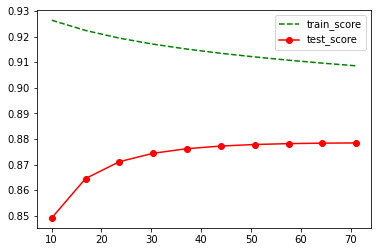

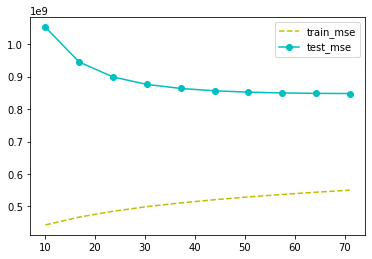

In [15]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
for sigma in np.linspace(10.05, 71.05, 10):
    alpha.append(sigma)
    reg = Ridge(alpha = sigma, tol = 0.0001)
    reg = reg.fit(X_train, y_train)
    pred = pd.DataFrame(reg.predict(testx_df_filled))
    score_train.append(round(reg.score(X_train, y_train),10))
    score_test.append(round(reg.score(X_test, y_test),10))
    mse_train.append(round(mserr(y_train,reg.predict(X_train)),4))
    mse_test.append(round(mserr(y_test,reg.predict(X_test)),4))
    testpred = pd.DataFrame(reg.predict(testx_df_filled))
    testpred.to_csv("test_pred.csv")
print(alpha, '\n', score_train, '\n', score_test)
print(alpha, '\n', mse_train, '\n', mse_test)
plt.figure(1)
plt.plot(alpha, score_train, 'g--', label = "train_score")
plt.plot(alpha, score_test, 'r-o', label = "test_score")
plt.xlabel = 'Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label = "train_mse")
plt.plot(alpha, mse_test, 'c-o',label = "test_mse")
plt.xlabel = 'Alpha'
plt.legend()
plt.show()